<Figure size 1600x1600 with 0 Axes>

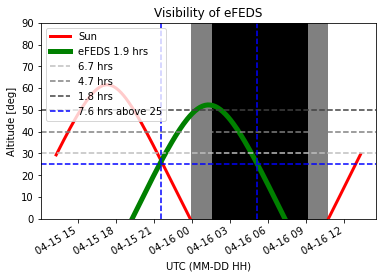

In [1]:
import pandas as pd
import astropy.coordinates as apc
import os
from datetime import datetime
import numpy as np
from astroquery.jplhorizons import Horizons
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import Angle
import M2_vis_plot
import make_el_chart as mec
import astropy.coordinates as apc
import os
import matplotlib.pyplot as plt

In [23]:
df_TNO_largest = pd.read_csv("largest_cat.txt",delimiter=', ,')


<ipython-input-23-51a82430cf11>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_TNO_largest = pd.read_csv("largest_cat.txt",delimiter=', ,')


In [31]:
df_TNO_largest['ra_0131']=np.nan
df_TNO_largest['dec_0131']=np.nan
for i in range(len(np.array(df_TNO_largest['Name']))):
    obj = Horizons(id=np.array(df_TNO_largest['Name'])[i], location='568',epochs={'start':'2022-01-31', 'stop':'2022-02-15','step':'7d'})
    eph = obj.ephemerides()
    datetime_str_array=np.array(eph['datetime_str'])
    ra_array=np.array(eph['RA'])
    dec_array=np.array(eph['DEC'])
    ra_0131=ra_array[0]
    dec_0131=dec_array[0]
    df_TNO_largest['ra_0131'][i]=ra_0131
    df_TNO_largest['dec_0131'][i]=dec_0131

<ipython-input-31-7468cfc7d833>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TNO_largest['ra_0131'][i]=ra_0131
<ipython-input-31-7468cfc7d833>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_TNO_largest['dec_0131'][i]=dec_0131


In [ ]:
df_TNO_largest_DECcuts=df_TNO_largest.loc[df_TNO_largest["dec_0131"]>-15.0]

/Users/karenperezsarmiento/Desktop/planet9/make_el_chart.py:209: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(1,dpi=dpi,figsize=(8,8));    plt.clf();    fig1,ax1 = plt.subplots()
/Users/karenperezsarmiento/Desktop/planet9/make_el_chart.py:209: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(1,dpi=dpi,figsize=(8,8));    plt.clf();    fig1,ax1 = plt.subplots()


<Figure size 1600x1600 with 0 Axes>

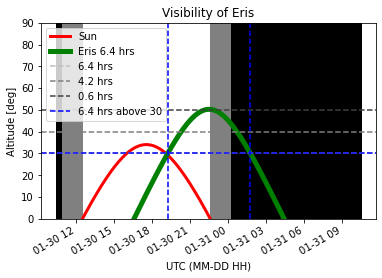

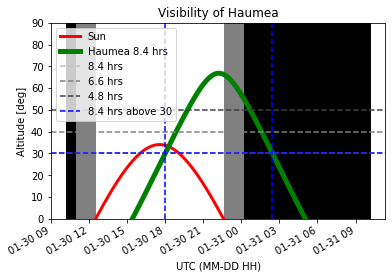

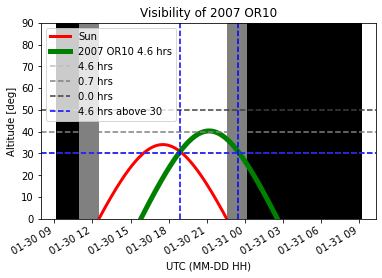

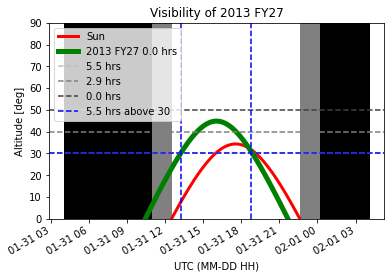

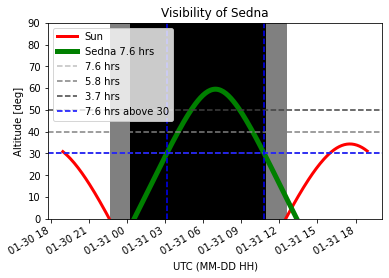

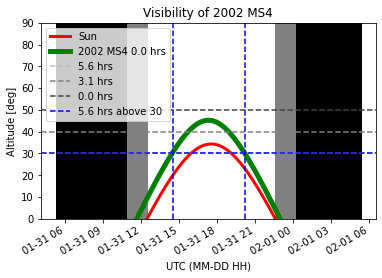

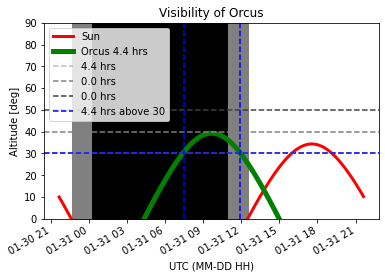

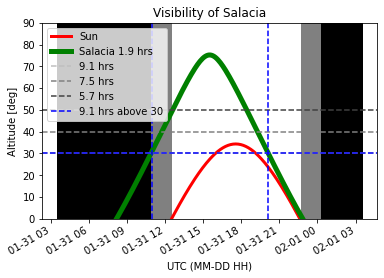

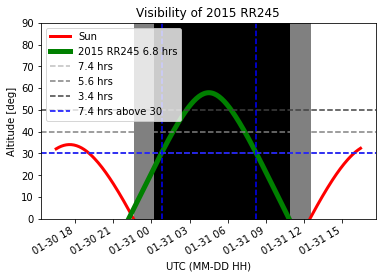

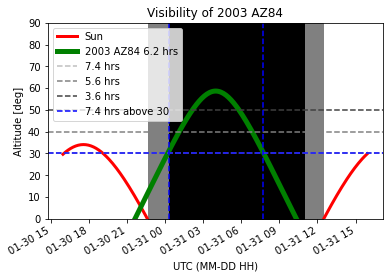

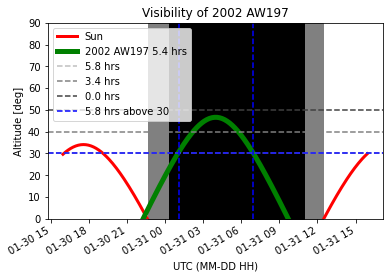

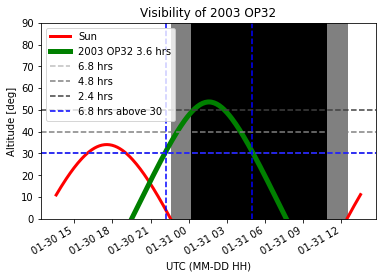

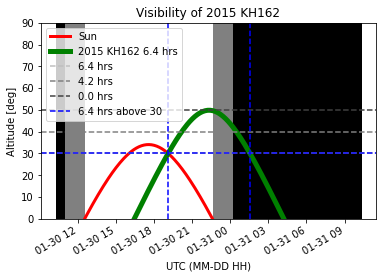

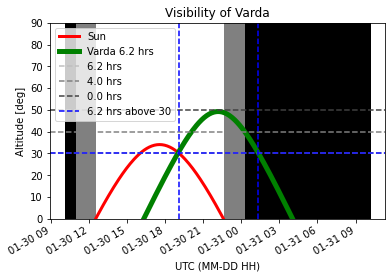

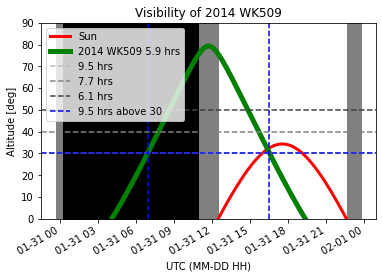

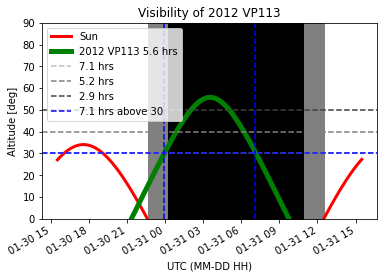

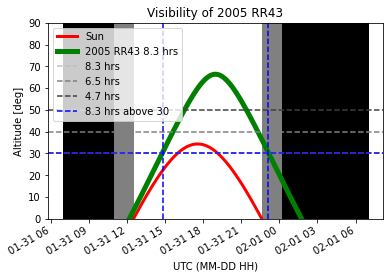

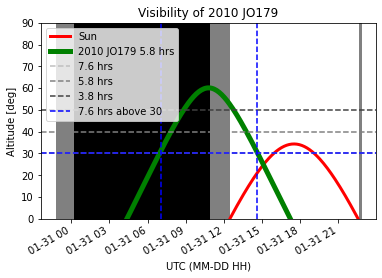

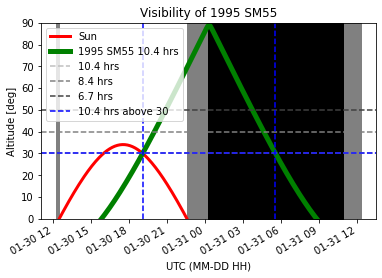

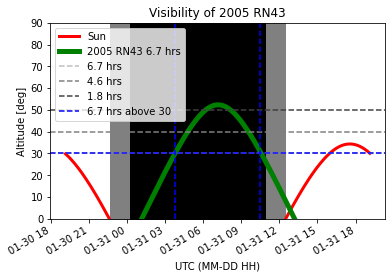

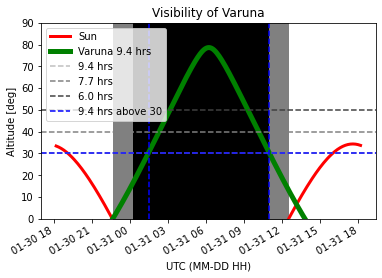

In [36]:
obj_ra = df_TNO_largest_DECcuts['ra_0131'].map(lambda x: apc.Angle(str(x)+'h'))
obj_dec = df_TNO_largest_DECcuts['dec_0131'].map(lambda x: apc.Angle(str(x)+'d'))
skyobj = apc.SkyCoord(obj_ra,obj_dec,equinox='J2000')
target = np.array(df_TNO_largest_DECcuts['Name'])
elMin=30.0
elStr = str(int(elMin))
date_obs  = datetime.strptime('31-01-2022 12:00:00', '%d-%m-%Y %H:%M:%S')
mydir = os.getcwd()
for i in range(len(target)):
    mec.plot_visibility(date_obs,skyobj[i],elMin=elMin,
                    mylabel=target[i],filename = target[i]+date_obs.strftime('%d%b%Y')+"_Visibility_above"+elStr,
                    mydir='largestTNOs_visibility/')